In [1]:
# IMPORTS
import io
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
from scipy.signal import find_peaks
import scipy.io as sio
import GDI
import seaborn as sns

/Users/joe/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# PARAMETERS
M           = 3
bin_width   = 30
boot_iter   = 5
time_max    = 300
num_neurons = 11

In [3]:
# LOAD DATA
SNNAP_output = []
with io.open("arb.out", mode="r", encoding="utf-8") as f:
    for line in f:
        SNNAP_output.append([float(i) for i in line.split()])
        if SNNAP_output[-1][0]>=time_max:
            break

# CONVERT TO ARRAY
SNNAP_output_array = np.asarray(SNNAP_output)

# TIME+VOLTAGES
time = SNNAP_output_array[:,0]
time_step = time[1]-time[0]
# FOR THE VOLTAGE TRACES, IGNORE FINAL TRACE (REDUNDANT)
volts = SNNAP_output_array[:,1:(num_neurons+1)]

([<matplotlib.axis.YTick at 0x7fe0c1e18fd0>,
 <a list of 11 Text yticklabel objects>)

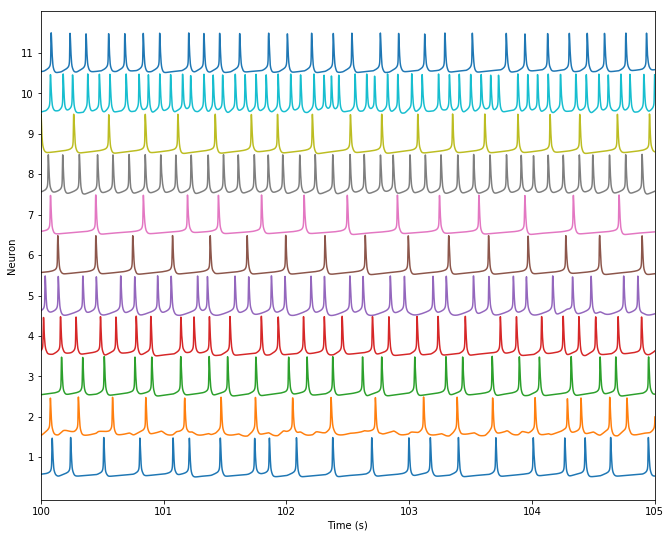

In [4]:
# PLOT 
f, ax = plt.subplots(figsize=(11, 9))
for ii in range(volts.shape[1]):
    plt.plot(time, ii+0.5+(volts[:,ii]-np.min(volts[:,ii]))/(np.max(volts[:,ii])-np.min(volts[:,ii])), 
    label='Neuron = %i'%(ii+1));

plt.xlim((100,105));
plt.xlabel('Time (s)');
plt.ylabel('Neuron');
plt.yticks(np.arange(11)+1);

In [5]:
binned_spikes = np.zeros(volts.shape)
for ii in range(volts.shape[1]):
    peaks = find_peaks(volts[:,ii], height=0)
    binned_spikes[peaks[0],ii] = 1

([<matplotlib.axis.YTick at 0x7fe0ad365c88>,
 <a list of 11 Text yticklabel objects>)

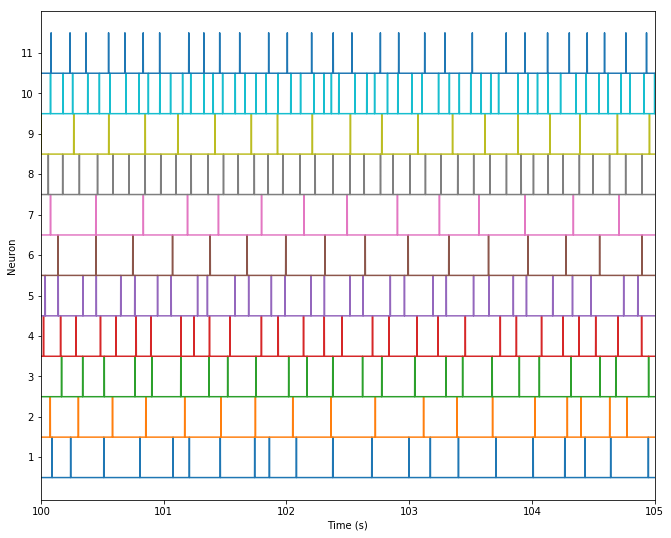

In [6]:
# PLOT binned_spikes
f, ax = plt.subplots(figsize=(11, 9))
for ii in range(binned_spikes.shape[1]):
    plt.plot(time, ii+0.5+binned_spikes[:,ii], label='Neuron = %i'%(ii+1));

plt.xlim((100,105));
plt.xlabel('Time (s)');
plt.ylabel('Neuron');
plt.yticks(np.arange(11)+1);

In [7]:
# FURTHER BIN SPIKE TIMES
num_bins = np.ceil(time_max/(bin_width*0.001))
range_max = num_bins*(bin_width*0.001)
further_binned_spikes = np.zeros((int(num_bins),volts.shape[1]))
for ii in range(volts.shape[1]):
    further_binned_spikes[:,ii], time_further_binned = np.histogram(time[binned_spikes[:,ii].astype(bool)],
                     bins=np.arange(0,range_max+((bin_width*0.001)/2),(bin_width*0.001)))

# CAP BINS TO 1 SPIKE
further_binned_spikes[further_binned_spikes>0]=1

([<matplotlib.axis.YTick at 0x7fe0ac904f60>,
 <a list of 11 Text yticklabel objects>)

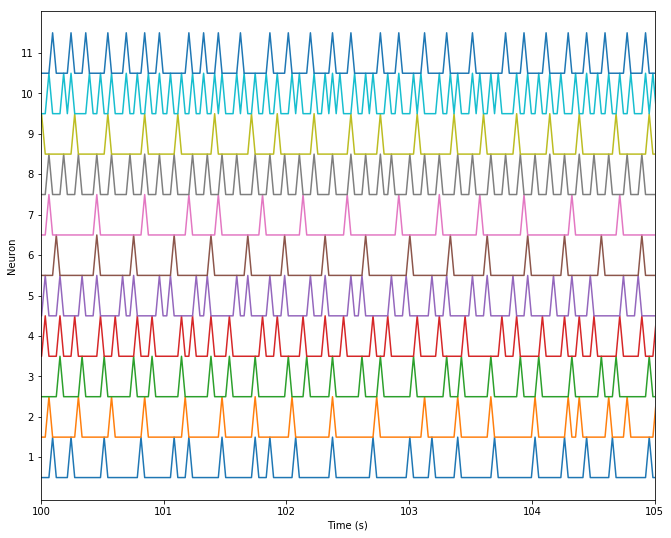

In [8]:
# PLOT further_binned_spikes
f, ax = plt.subplots(figsize=(11, 9))
for ii in range(further_binned_spikes.shape[1]):
    plt.plot(time_further_binned[:-1]+((bin_width*0.001)/2), ii+0.5+further_binned_spikes[:,ii], label='Neuron = %i'%(ii+1));

plt.xlim((100,105));
plt.xlabel('Time (s)');
plt.ylabel('Neuron');
plt.yticks(np.arange(11)+1);

In [9]:
# LOAD NORMALIZATION
HMatrix = sio.loadmat('11neuron_normalization.mat')['HMatrix']

DI_est  = GDI.DI(further_binned_spikes,M,boot_iter)
DI_est_norm = DI_est*(1/np.log(2))/HMatrix
DI_est_norm[DI_est_norm<0.01] = 0

GDI_est = GDI.GDI_mask(further_binned_spikes,M,boot_iter,DI_est_norm>0)
GDI_est_norm = GDI_est*(1/np.log(2))/HMatrix
GDI_est_norm[GDI_est_norm<0]=0

Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan


Tester = Classifier, metric = donsker_varadhan


Tester = Classifier, metric = donsker_varadhan


W0927 17:00:43.768122 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/CCMI.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.
W0927 17:00:43.762683 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/CCMI.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.


W0927 17:00:43.778609 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/CCMI.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.


Tester = Classifier, metric = donsker_varadhan


W0927 17:00:43.786391 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/CCMI.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.



Tester = Classifier, metric = donsker_varadhan


W0927 17:00:43.801826 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:66: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.
W0927 17:00:43.790022 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/CCMI.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.
W0927 17:00:43.803710 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:66: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.




W0927 17:00:43.812453 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:66: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.


Tester = Classifier, metric = donsker_varadhan


W0927 17:00:43.807255 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/CCMI.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.
W0927 17:00:43.820065 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:66: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.
W0927 17:00:43.811770 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/CCMI.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0927 17:00:43.825920 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:66: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



W0927 17:00:43.836369 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:49: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.
W

Use tf.where in 2.0, which has the same broadcast rule as np.where

W0927 17:00:45.129492 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:71: The name tf.losses.get_regularization_loss is deprecated. Please use tf.compat.v1.losses.get_regularization_loss instead.
W0927 17:00:45.132409 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:81: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

W0927 17:00:45.140341 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:81: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.
W0927 17:00:45.144469 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:71: The name tf.losses.get_regularization_loss is deprecated. Please use tf.compat.v1.losses.get_regularization_loss instead.



W0927 17:00:45.179100 4456820160 depreca

Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Clas

/Users/joe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/joe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/Users/joe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan


Tester = Classifier, metric = donsker_varadhan


W0927 17:06:14.769178 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/CCMI.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0927 17:06:14.773528 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/CCMI.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.


Tester = Classifier, metric = donsker_varadhan


Tester = Classifier, metric = donsker_varadhan



W0927 17:06:14.786967 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:66: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.
W0927 17:06:14.778625 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/CCMI.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.



Tester = Classifier, metric = donsker_varadhan


W0927 17:06:14.786234 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/CCMI.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.
W0927 17:06:14.791876 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:66: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.


Tester = Classifier, metric = donsker_varadhan


Tester = Classifier, metric = donsker_varadhan


W0927 17:06:14.798469 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/CCMI.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.


W0927 17:06:14.802710 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/CCMI.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.
W0927 17:06:14.791599 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/CCMI.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0927 17:06:14.805106 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/CCMI.py:79: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0927 17:06:14.809989 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:66: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder in

Use tf.where in 2.0, which has the same broadcast rule as np.where


W0927 17:06:15.662615 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:81: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.
W0927 17:06:15.657341 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:81: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.
W0927 17:06:15.662715 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:71: The name tf.losses.get_regularization_loss is deprecated. Please use tf.compat.v1.losses.get_regularization_loss instead.

W0927 17:06:15.673345 4456820160 deprecation_wrapper.py:119] From /Users/joe/GDI_Code_Dev/Classifier_MI.py:81: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.



W0927 17:06:15.675462 4456820160 deprecation_wrapper.py:119] 

Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan
Tester = Classifier, metric = donsker_varadhan


/Users/joe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/Users/joe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.


In [10]:
GDI_sign, DI_sign = GDI.sign_inference(further_binned_spikes,M)

DI_est_norm_signed = DI_est_norm*DI_sign
GDI_est_norm_signed = GDI_est_norm*GDI_sign

0
 
[[-1.00000000e+00 -1.00000000e+00 -1.00000000e+00]
 [ 4.38750248e-02 -1.45957064e-03 -2.86395327e-02]
 [ 3.03890702e-02  4.48142401e-03 -2.95926870e-03]
 [-8.89282361e-02 -4.98389658e-02 -3.91408402e-02]
 [-5.06254951e-02  3.96099349e-02  3.34634885e-02]
 [ 1.14103467e-01  2.47952639e-01  7.83691459e-02]
 [ 3.17370373e-04 -1.52063816e-02 -1.07391579e-02]
 [-1.42561604e-02 -8.18810481e-04  9.34628159e-04]
 [-2.10085205e-03  1.19648261e-02 -4.33855278e-03]
 [ 1.33904460e-02  3.24628281e-03  6.19320278e-03]
 [-4.83395234e-02 -5.16851033e-03 -1.44566923e-02]]
 
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 4.10752072e-02 -1.99112917e-02 -3.64533727e-02]
 [ 3.58428499e-02  4.30828293e-03 -5.93007186e-03]
 [-8.30881860e-02 -6.21931622e-02 -4.38070072e-02]
 [-3.27685484e-02  8.48440674e-02  5.20191972e-02]
 [ 1.11016846e-01  2.60282544e-01  8.93754172e-02]
 [ 2.78279367e-03 -1.04519335e-02 -9.36138327e-03]
 [-3.68171890e-03  1.32201424e-03 -2.91727674e-03]
 [-2.66896674e-03  1.584

In [ ]:
# Define true connectivity matrix which has +/- 1s for connection and 0s for no connection
true_conn = np.zeros((R,R))

true_conn[5,0]  = 1
true_conn[5,2]  = 1
true_conn[5,4]  = -1

true_conn[5,1]  = 1
true_conn[7,1]  = -1
true_conn[8,1]  = 1

true_conn[2,9] = 1
true_conn[4,9] = 1

true_conn[0,3]  = 1
true_conn[3,10] = 1

In [ ]:
# Plot true connectivity
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the correct aspect ratio
sns.heatmap(true_conn, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Connectivity')

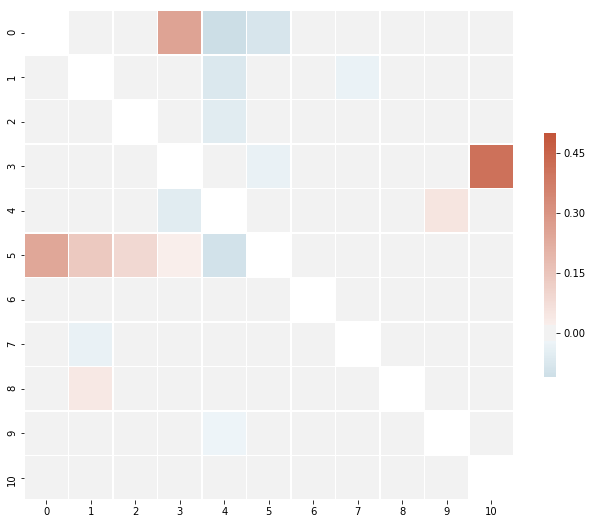

In [16]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the correct aspect ratio
sns.heatmap(DI_est_norm_signed, cmap=cmap, vmax=0.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

plt.title('DI')

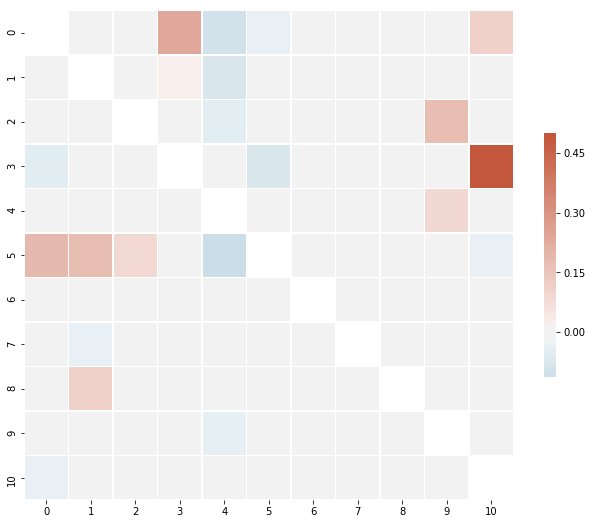

In [17]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the correct aspect ratio
sns.heatmap(GDI_est_norm_signed, cmap=cmap, vmax=0.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

plt.title('GDI')